# Content Based Movie Recommender System on TMDB Dataset

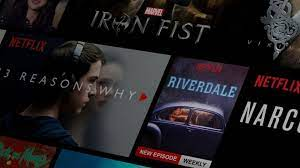


In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings ('ignore')

### Importing the DataSet

### The movies DataSet

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1523,32000000,"[{""id"": 10752, ""name"": ""War""}, {""id"": 80, ""nam...",http://www.the-good-german.de,182,"[{""id"": 220, ""name"": ""berlin""}, {""id"": 417, ""n...",en,The Good German,An American journalist played by George Cloone...,5.347936,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-12-08,5914908,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"If war is Hell, then what comes after?",The Good German,5.9,86


In [4]:
movies.shape

(4803, 20)

### The Credits Data ( Contains the Cast and Crew)

In [5]:
credits=pd.read_csv('tmdb_5000_credits.csv')

In [6]:
credits.sample(1)

,movie_id,title,cast,crew
4116,13121,Teeth,"[{""cast_id"": 3, ""character"": ""Dawn O'Keefe"", ""...","[{""credit_id"": ""54d920369251410a3f00024c"", ""de..."


In [7]:
credits.shape

(4803, 4)

### Merging the movies and credits dataset

In [8]:
movies= movies.merge(credits,on='title')

In [9]:
# Sample of new dataset

movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
1620,30000000,"[{""id"": 10402, ""name"": ""Music""}]",NaN,12763,"[{""id"": 1342, ""name"": ""dancing master""}, {""id""...",en,Take the Lead,A former professional dancer volunteers to tea...,8.999675,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Follow,Take the Lead,6.6,162,12763,"[{""cast_id"": 1, ""character"": ""Pierre Dulaine"",...","[{""credit_id"": ""556add5cc3a36826f80011db"", ""de..."


In [10]:
movies.shape

(4809, 23)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

#### Feature Selection

In [12]:
columns_to_keep=['movie_id','title','overview','genres','keywords','cast','crew']

In [13]:
movies=movies[columns_to_keep]

In [14]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [15]:
movies.shape

(4809, 7)

#### Treating the missing values

In [16]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
movies.dropna(inplace=True)

#### Check for Duplicates

In [18]:
movies.duplicated().sum()

0

### Feature Engineering

### Genres

In [19]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#####  This is a list of dictionaries and we need only the values from the name key of each dictionary. So we need to make a function to fetch the names of the geners only.

In [20]:
import ast

def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [21]:
movies['genres']=movies['genres'].apply(convert)

In [22]:
movies.iloc[0]['genres']

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

### keywords

In [23]:
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

##### We will aply the same operation to the keyword column.

In [24]:
movies['keywords']=movies['keywords'].apply(convert)

In [25]:
movies.iloc[0]['keywords']

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

### cast

In [ ]:
movies.iloc[0]['cast']

##### The cast column contains a large number of dictionaries and we need to fetch only the name of top 3 cast from it.

In [27]:
def top_3cast(obj):
    L=[]
    j=0
    for i in ast.literal_eval(obj):
        if j !=3:
            L.append(i['name'])
            j=j+1
        else:
            break
    return L

In [28]:
movies['cast']=movies['cast'].apply(top_3cast)

In [29]:
movies.iloc[0]['cast']

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

### crew

In [ ]:
movies.iloc[0]['crew']

##### The crew column again contains a number of dictionaries with different jobs. we are going to build recoomendation based on the job of Director. So we need to fetch the name of director only.

In [31]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [32]:
movies['crew']=movies['crew'].apply(fetch_director)

In [33]:
movies.iloc[0]['crew']

['James Cameron']

In [34]:
# The dataset in the required format
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


##### The elements in overview column are strings but we need them in the form of list so that we can concatnate with the other feature to make a single tag for each movie.

In [35]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [36]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

##### We are going to remove spaces from every name so that they represent a single quantity.

In [37]:
movies['genres']=movies['genres'].apply(lambda x: [i.replace(' ','')for i in x])
movies['keywords']=movies['keywords'].apply(lambda x: [i.replace(' ','')for i in x])
movies['cast']=movies['cast'].apply(lambda x: [i.replace(' ','')for i in x])
movies['crew']=movies['crew'].apply(lambda x: [i.replace(' ','')for i in x])

In [38]:
#Let's Create the tags


movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [39]:
movies['tags']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4806, dtype: object

In [40]:
# The new Dataframe that we will carry further

new_movies= movies[['movie_id','title','tags']]

In [41]:
new_movies

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [42]:
#Let's convert the tags from list to string typeS

new_movies['tags']=new_movies['tags'].apply(lambda x : " ".join(x) )

In [43]:
 new_movies['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

##### Coverting the tags to lowercase

In [44]:
new_movies['tags']=new_movies['tags'].apply(lambda x:x.lower())

In [45]:
 new_movies['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

### Stemming
[loved,loving] changes to [love,love]

In [46]:
import nltk

In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [48]:
ps.stem('loving'),ps.stem('loved')

('love', 'love')

In [49]:
def stem(text):
    l = []
    
    for i in text.split():
        l.append(ps.stem(i))
        
    return " ".join(l)

##### Stemming of tags column

In [50]:
new_movies['tags']=new_movies['tags'].apply(stem)

In [51]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


### Text-Vectorization 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features= 5000, stop_words= 'english')

In [53]:
vectors=cv.fit_transform(new_movies['tags']).toarray()

In [54]:
vectors.shape

(4806, 5000)

In [55]:
len(cv.get_feature_names())

5000

In [56]:
cv.get_feature_names()[50:70]

['500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident']

### Cosine Similarity 
- Cosine similarity is a measure of similarity between two sequences of numbers.

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
similarity = cosine_similarity(vectors)

In [59]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [60]:
sorted(similarity[0],reverse=True)[:6]

[1.0000000000000002,
 0.28676966733820225,
 0.26901379342448517,
 0.2605130246476754,
 0.255608593705383,
 0.2503866978335957]

In [ ]:
list(enumerate(similarity[0]))

In [62]:
# The top 5 similar vectors.

sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x: x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.2503866978335957)]

#### Building a Recommendation model


- Let's define a function to fetch top 5 similar movies based on the similarity score

In [63]:
def recommend(movie):
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    distances=similarity[movie_index ]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

#### Recommending a movie

In [64]:
recommend('Spectre')

Quantum of Solace
Skyfall
Never Say Never Again
From Russia with Love
Octopussy


In [65]:
recommend('John Carter')

Riddick
Krrish
The Other Side of Heaven
The Legend of Hercules
Get Carter


#### Saving the model for further deployment

In [62]:
import pickle

In [63]:
pickle.dump(new_movies.to_dict(),open('dict_movies.pkl','wb'))

In [65]:
pickle.dump(similarity,open('similarity.pkl','wb'))